### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [13]:
data = pd.read_csv('data/coupons.csv')

In [15]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [17]:
data.info()

# Determine the percentage of null data in each column.
data.isnull().sum()/data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [19]:
# Since the data in the car column is missing for over 99% of the rows, I am going to just drop this column
data.drop("car", axis=1, inplace = True)

# Since the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20to50 values are missing from a small
# portion of the overall dataset, I am also just going to drop these rows, since there isn't an obvious value to 
# fill them with from the other values in these columns.
data.dropna(inplace = True)

# Shape of adjusted dataset:
data.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [21]:
# We can just sum the 1's from the Y column because those indicate the customers that accepted the coupon
# and then divide by the total number of rows in the dataset to figure out the percent that accepted.

data[["Y"]].sum()/data.shape[0]

Y    0.569335
dtype: float64

5. Use a bar plot to visualize the `coupon` column.

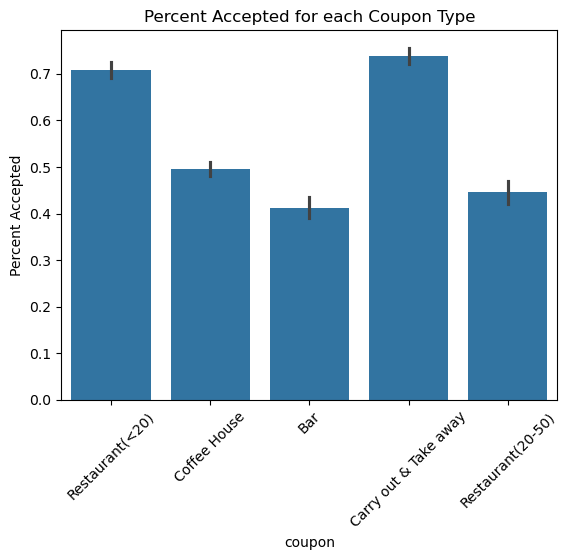

In [23]:
ax = sns.barplot(data, x = "coupon", y = "Y")
ax.set(ylabel = "Percent Accepted", title="Percent Accepted for each Coupon Type")
plt.xticks(rotation = 45)
plt.show()

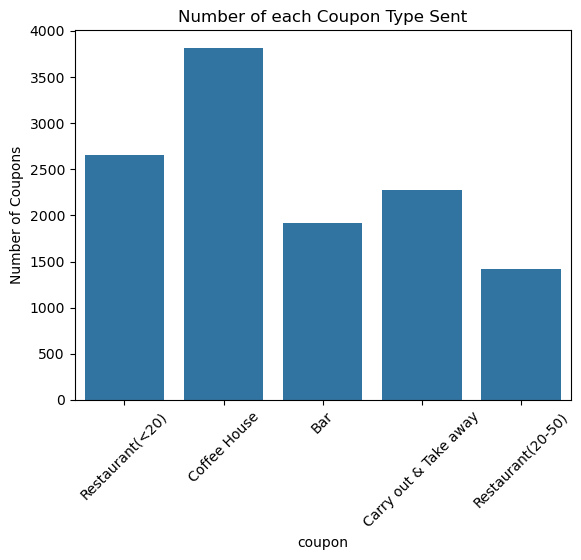

In [25]:
ax = sns.countplot(data, x = "coupon")
ax.set(ylabel = "Number of Coupons", title = "Number of each Coupon Type Sent")
plt.xticks(rotation = 45)
plt.show()

6. Use a histogram to visualize the temperature column.

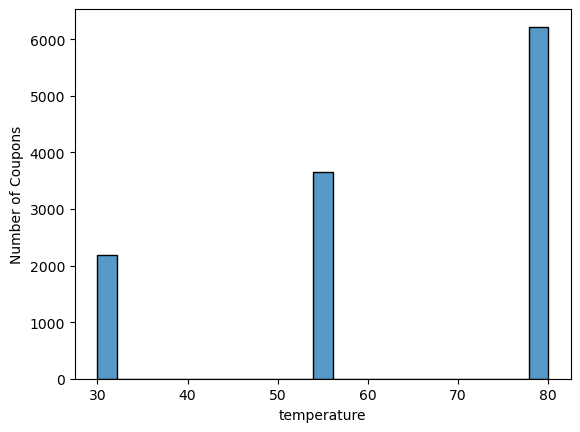

In [27]:
ax = sns.histplot(data["temperature"])
ax.set(ylabel = "Number of Coupons")
plt.show()

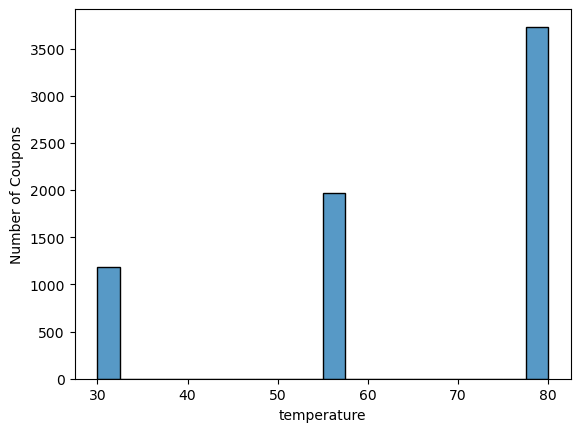

In [29]:
# histogram of temperature based on just rows where the coupon was accepted.
ax = sns.histplot(data.query('Y == True')["temperature"])
ax.set(ylabel = "Number of Coupons")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [48]:
# Create a new dataset bar_data with just the rows where the coupon is Bar
bar_data = data.query('coupon == "Bar"')
bar_data.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [50]:
# Similar to before, we can just sum the 1's from the Y column because those indicate the customers that accepted
# the coupon and then divide by the total number of rows in the dataset to figure out the percent that accepted.
bar_data[["Y"]].sum()/bar_data.shape[0]

Y    0.411918
dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [52]:
# All of the values that are 3 or less times per month
fewer_3 = ["never", "less1", "1~3"]
# All of the values that are 4 or more times per month
plus_4 = ["4~8", "gt8"]

# calculate and print acceptance rates for both categories
# we can use mean because since Y is just True(1) or False(0) the mean will be equal to the percentage that is True
print("Acceptance Rate for those who went to a bar 3 or fewer times per month:")
print (bar_data.query('Bar in @fewer_3')["Y"].mean())

print("Acceptance Rate for those who went to a bar 4 or more times per month:")
print (bar_data.query('Bar in @plus_4')["Y"].mean())

Acceptance Rate for those who went to a bar 3 or fewer times per month:
0.37267441860465117
Acceptance Rate for those who went to a bar 4 or more times per month:
0.7616580310880829


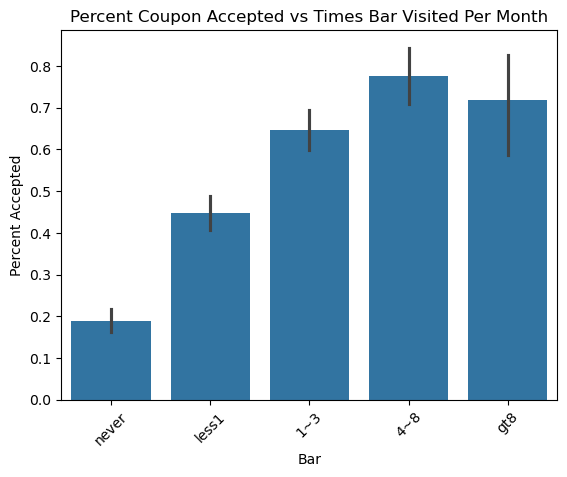

In [54]:
custom_order = ["never", "less1", "1~3", "4~8", "gt8"]
ax = sns.barplot(bar_data, x = "Bar", y = "Y", order = custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Times Bar Visited Per Month")
plt.xticks(rotation = 45)
plt.show()

There is a higher bar coupon acceptance rate for drivers who go to bars more often.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
# All values that are 1+ times per month
more1 = ["1~3", "4~8", "gt8"]
# All values that are over age 25
over25 = ["26", "31", "36", "41", "46", "50plus"]

print("Acceptance Rate for those who went to a bar 1+ times and over 25")
print(bar_data.query('Bar in @more1 and age in @over25')["Y"].mean())

print("Acceptance Rate for all others")
print(bar_data.query('not (Bar in @more1 and age in @over25)')["Y"].mean())

Acceptance Rate for those who went to a bar 1+ times and over 25
0.6898263027295285
Acceptance Rate for all others
0.33774834437086093


The drivers who go to bars 1+ times per month and are over 25 are more likely to accept the bar coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [58]:
# All values that are drivers who go to a bar 1+ times per month
more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who went to a bar 1+ times, passengers are not a kid, and occupation not Farming, Fishing or Forestry")
print(bar_data.query('Bar in @more1 and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')["Y"].mean())

print("Acceptance Rate for all others")
print(bar_data.query('not (Bar in @more1 and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry")')["Y"].mean())

Acceptance Rate for those who went to a bar 1+ times, passengers are not a kid, and occupation not Farming, Fishing or Forestry
0.7094339622641509
Acceptance Rate for all others
0.29790310918293567


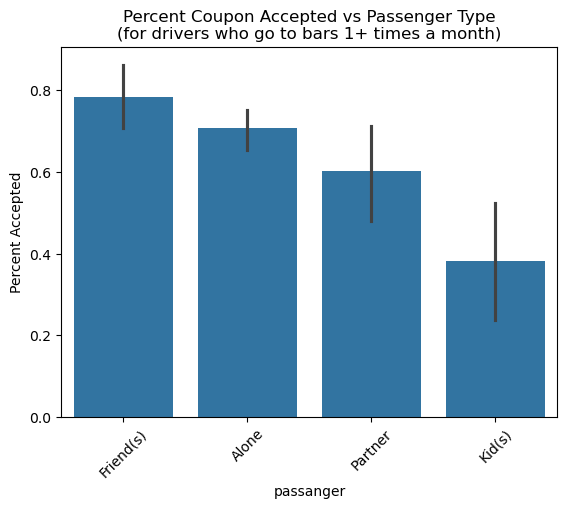

In [60]:
ax = sns.barplot(bar_data.query('Bar in @more1'), x = "passanger", y = "Y")
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Passenger Type\n(for drivers who go to bars 1+ times a month)")
plt.xticks(rotation = 45)
plt.show()

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry were more likley to accept the bar coupon than the rest of this group.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [64]:
# All values that are 1+ times per month
more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who went to a bar 1+ times a month, passengers are not a kid, and were not widowed")
print(bar_data.query('Bar in @more1 and passanger != "Kid(s)" and maritalStatus != "Widowed"')["Y"].mean())

# All ages under 30
under_30 = ["below21", "21", "26"]

print("Acceptance Rate for those who went to a bar 1+ times a month and are under 30")
print(bar_data.query('Bar in @more1 and age in @under_30')["Y"].mean())

# All values that are 4+ times per month
more4 = ["4~8", "gt8"]
# All values under 50K
under_50K = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]
print("Acceptance Rate for those who go to cheap restaurants 4+ times a month and have income < 50K")
print(bar_data.query('RestaurantLessThan20 in @more4 and income in @ under_50K')["Y"].mean())

Acceptance Rate for those who went to a bar 1+ times a month, passengers are not a kid, and were not widowed
0.7094339622641509
Acceptance Rate for those who went to a bar 1+ times a month and are under 30
0.7195121951219512
Acceptance Rate for those who go to cheap restaurants 4+ times a month and have income < 50K
0.45645645645645644


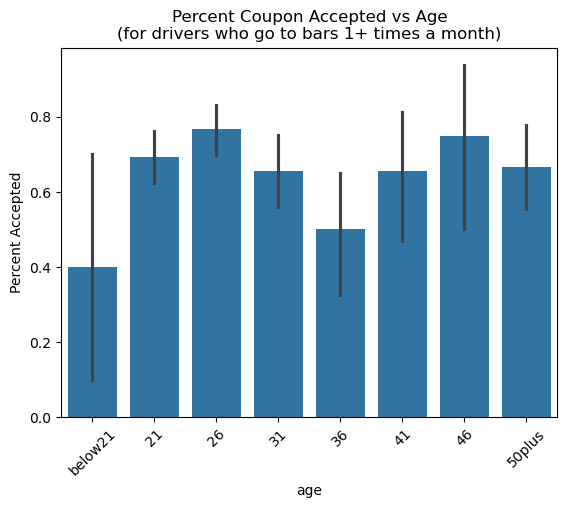

In [66]:
custom_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
ax = sns.barplot(bar_data.query('Bar in @more1'), x = "age", y = "Y", order=custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Age\n(for drivers who go to bars 1+ times a month)")
plt.xticks(rotation = 45)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations above, bar coupons seem to be more likely to be accepted by people who go to 
bars once a month or more.
Within this group, drivers who do not have kids in the car with them are more likely to accept the bar coupon.
Also younger drivers (21-30) seem more like to go to bars, provided they are over 21. 
Note that although their appears to be a larger percentage in the 46-50 age category, this only consists of 16 drivers who go to bars 1+ times per month.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [69]:
# I decided the explore the drivers who received more expensive restaurant coupons.
# Here is a subset of the data that contains just the expensive restaurant ($20-$50) coupons
expensive_restaurant_data = data.query('coupon == "Restaurant(20-50)"')
expensive_restaurant_data.shape

(1417, 25)

In [71]:
#Determine the overall acceptance of cheap restaurant coupons 
expensive_restaurant_data[["Y"]].sum()/expensive_restaurant_data.shape[0]

Y    0.446013
dtype: float64

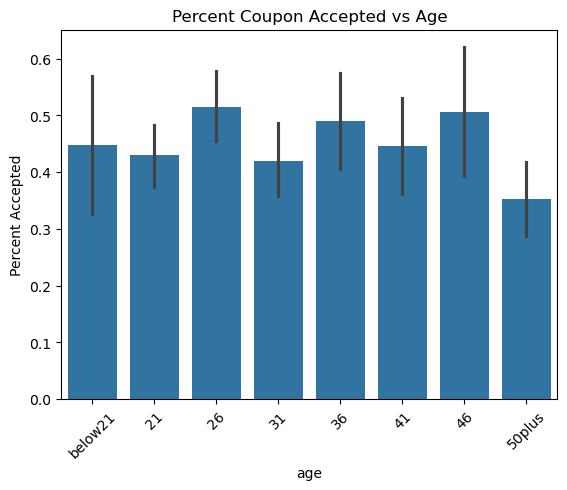

In [73]:
custom_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
ax = sns.barplot(expensive_restaurant_data, x = "age", y = "Y", order=custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Age")
plt.xticks(rotation = 45)
plt.show()

Age alone does not seem to have much impact on who accepts coupons to more expensive restaurants.

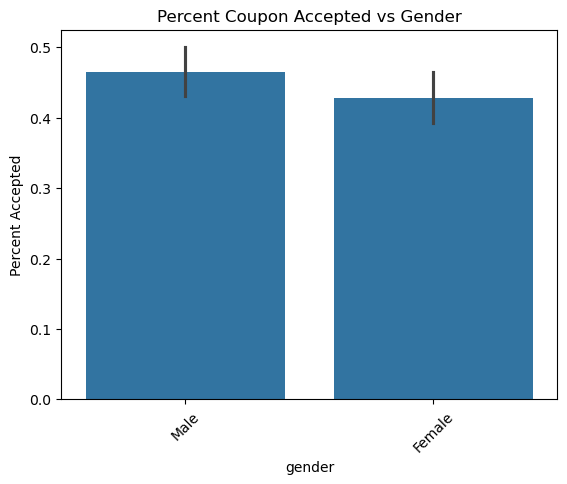

In [75]:
ax = sns.barplot(expensive_restaurant_data, x = "gender", y = "Y")
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Gender")
plt.xticks(rotation = 45)
plt.show()

There is also not much difference is coupon acceptance based on gender. 

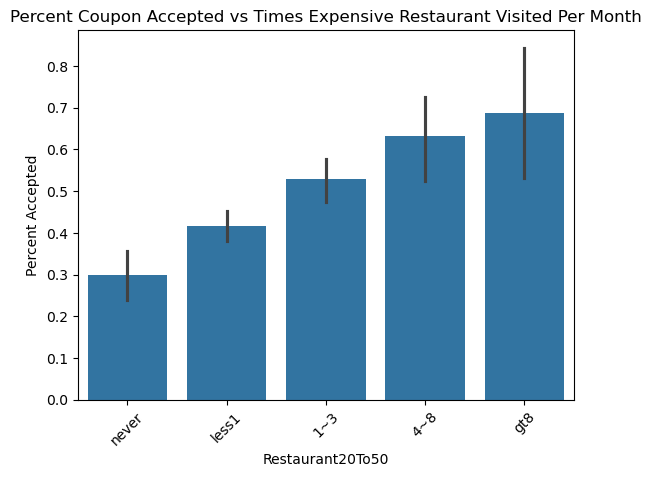

In [93]:
custom_order = ["never", "less1", "1~3", "4~8", "gt8"]
ax = sns.barplot(expensive_restaurant_data, x = "Restaurant20To50", y = "Y", order = custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Times Expensive Restaurant Visited Per Month")
plt.xticks(rotation = 45)
plt.show()

In [98]:
# All values that are 1+ times per month
more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who go to expensive restaurants 1 or more times per month.")
print(expensive_restaurant_data.query('Restaurant20To50 in @more1')["Y"].mean())

print("Acceptance Rate for those who go to expensive restaurants less than once a month.")
print(expensive_restaurant_data.query('not (Restaurant20To50 in @more1)')["Y"].mean())

Acceptance Rate for those who go to expensive restaurants 1 or more times per month.
0.5564681724845996
Acceptance Rate for those who go to expensive restaurants less than once a month.
0.3881720430107527


Drivers who typically go to expensive restaurants 1+ times per month are more likely to accept the expensive restaurant coupon.

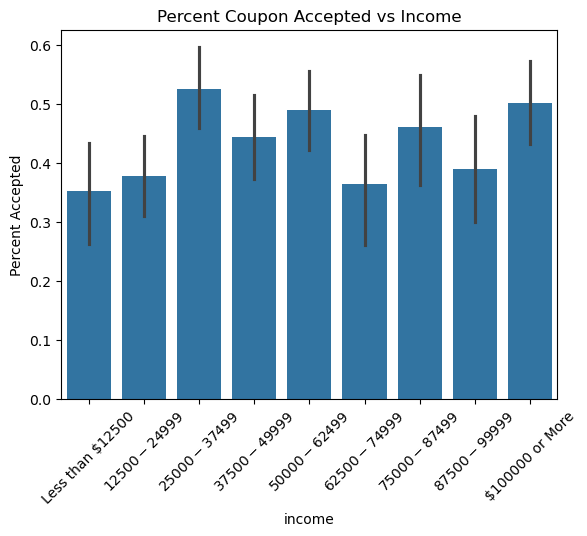

In [77]:
custom_order = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", 
                "$87500 - $99999", "$100000 or More"]

ax = sns.barplot(expensive_restaurant_data, x = "income", y = "Y", order = custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Income")
plt.xticks(rotation = 45)
plt.show()

In [101]:
#Income under 25K
income_lt_25K = ["Less than $12500", "$12500 - $24999"]
#Income over 25K
income_gt_25K = ["$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", 
                "$87500 - $99999", "$100000 or More"]

print("Acceptance Rate for those who earn under 25K")
print(expensive_restaurant_data.query('income in @income_lt_25K')["Y"].mean())

print("Acceptance Rate for those who earn over 25K")
print(expensive_restaurant_data.query('income in @income_gt_25K')["Y"].mean())

more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who earn over 25K and go to expensive restaurants 1+ times per month")
print(expensive_restaurant_data.query('Restaurant20To50 in @more1 and income in @income_gt_25K')["Y"].mean())

Acceptance Rate for those who earn under 25K
0.3682539682539683
Acceptance Rate for those who earn over 25K
0.46823956442831216
Acceptance Rate for those who earn over 25K and go to expensive restaurants 1+ times per month
0.553921568627451


Income of at least $25K seems to make it a bit more likely for the driver to accept the expensive restaurant coupon.

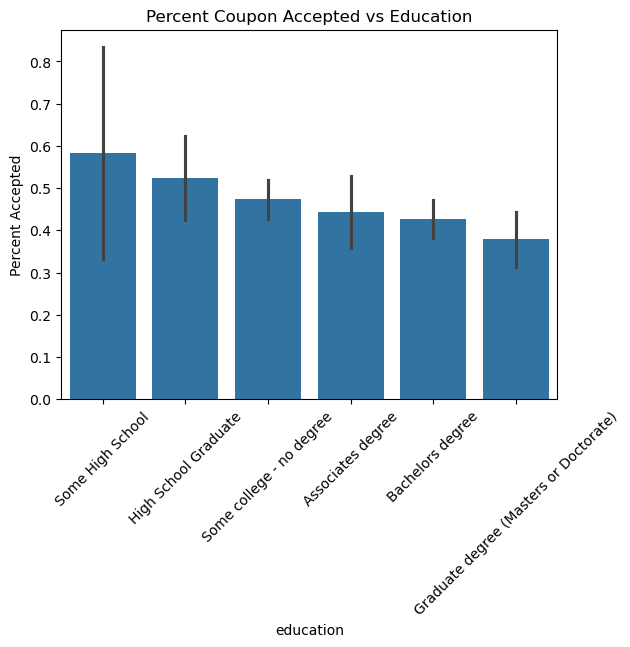

In [81]:
custom_order = ["Some High School", "High School Graduate", "Some college - no degree", "Associates degree", "Bachelors degree", 
                "Graduate degree (Masters or Doctorate)"]
ax = sns.barplot(expensive_restaurant_data, x = "education", y = "Y", order = custom_order)
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Education")
plt.xticks(rotation = 45)
plt.show()

In [107]:
no_college = ["Some High School", "High School Graduate"]
print("Acceptance Rate for those who didn't attend college")
print(expensive_restaurant_data.query('education in @no_college')["Y"].mean())

more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who didn't attend college and go to expensive restaurants 1+ times per month")
print(expensive_restaurant_data.query('Restaurant20To50 in @more1 and education in @no_college')["Y"].mean())

Acceptance Rate for those who didn't attend college
0.5309734513274337
Acceptance Rate for those who didn't attend college and go to expensive restaurants 1+ times per month
0.6521739130434783


The acceptance rate of expensive restaurant coupons also appears to be slightly higher for drivers who did not attend any college.

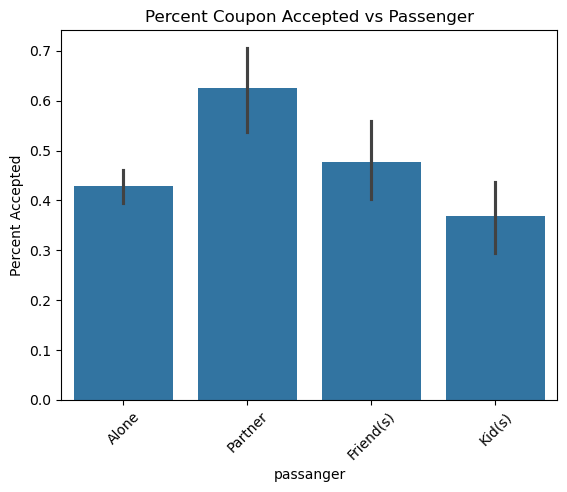

In [85]:
ax = sns.barplot(expensive_restaurant_data, x = "passanger", y = "Y")
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Passenger")
plt.xticks(rotation = 45)
plt.show()

In [109]:
income_gt_25K = ["$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", 
                "$87500 - $99999", "$100000 or More"]
more1 = ["1~3", "4~8", "gt8"]

print("Acceptance Rate for those who are in the car with their partner")
print(expensive_restaurant_data.query('passanger == "Partner"')["Y"].mean())

print("Acceptance Rate for those in the car with their partner who earn over 25K and go to expensive restaurants 1+ times per month")
print(expensive_restaurant_data.query('passanger == "Partner" and income in @income_gt_25K and Restaurant20To50 in @more1')["Y"].mean())

Acceptance Rate for those who are in the car with their partner
0.625
Acceptance Rate for those in the car with their partner who earn over 25K and go to expensive restaurants 1+ times per month
0.7391304347826086


Drivers who have their partner in the car with them are much more likely to accept the coupon.  This increases a little more if they also earn $25K or more.

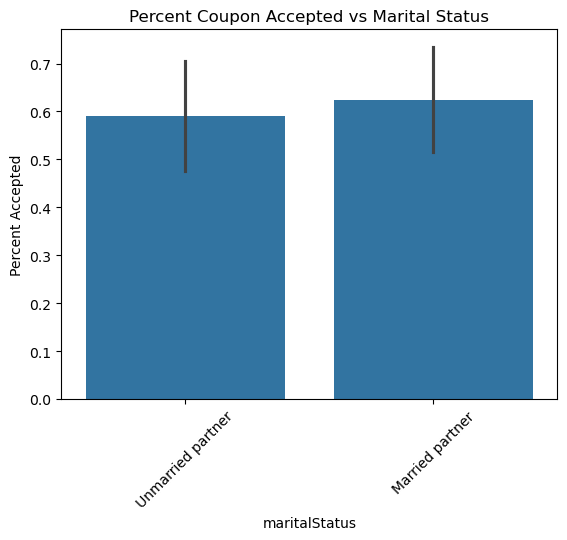

In [89]:
has_partner = ["Unmarried partner", "Married partner"]
ax = sns.barplot(expensive_restaurant_data.query('passanger == "Partner" and maritalStatus in @has_partner'), x = "maritalStatus", y = "Y")
ax.set(ylabel = "Percent Accepted", title="Percent Coupon Accepted vs Marital Status")
plt.xticks(rotation = 45)
plt.show()

For those drivers who are in the car with their partner, there is not a significant difference in coupon acceptance based on whether they are married or unmarried.